In [1]:

import pandas as pd
import numpy as np 
import random
import math
import matplotlib.pyplot as plt # for data visualization purposes
%matplotlib inline
import seaborn as sns # for statistical data visualization
import os
import warnings
warnings.filterwarnings('ignore')
from print_utils import Printer

# from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler,StandardScaler,RobustScaler

#Metrics
from sklearn.metrics import make_scorer, accuracy_score,precision_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score ,precision_score,recall_score,f1_score,roc_auc_score

#Model Select
from sklearn.model_selection import KFold,train_test_split,cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split as sk_train_test_split
from sklearn.linear_model import  LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import linear_model
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

from linear_regression import MyLinearRegression,computecost, gradientdescent, metrics
from split_dataset import train_test_split as my_test_train_split
from split_dataset import print_split_dataset
from error_metrics import error_metrics

def check_missing_values(df,columns):
    return True if df[columns].isnull().all().sum()>0 else False


In [2]:
data = pd.read_csv("datasets/Fifa_23_Players_Data.csv")
print(data.columns)

Index(['Known As', 'Full Name', 'Overall', 'Potential', 'Value(in Euro)',
       'Positions Played', 'Best Position', 'Nationality', 'Image Link', 'Age',
       'Height(in cm)', 'Weight(in kg)', 'TotalStats', 'BaseStats',
       'Club Name', 'Wage(in Euro)', 'Release Clause', 'Club Position',
       'Contract Until', 'Club Jersey Number', 'Joined On', 'On Loan',
       'Preferred Foot', 'Weak Foot Rating', 'Skill Moves',
       'International Reputation', 'National Team Name',
       'National Team Image Link', 'National Team Position',
       'National Team Jersey Number', 'Attacking Work Rate',
       'Defensive Work Rate', 'Pace Total', 'Shooting Total', 'Passing Total',
       'Dribbling Total', 'Defending Total', 'Physicality Total', 'Crossing',
       'Finishing', 'Heading Accuracy', 'Short Passing', 'Volleys',
       'Dribbling', 'Curve', 'Freekick Accuracy', 'LongPassing', 'BallControl',
       'Acceleration', 'Sprint Speed', 'Agility', 'Reactions', 'Balance',
       'Shot Powe

# Linear Regression

For the Linear regression model, the cost function will be the minimum of the Root Mean Squared Error of the model, obtained by subtracting the predicted values from actual values. The cost function will be the minimum of these error values.

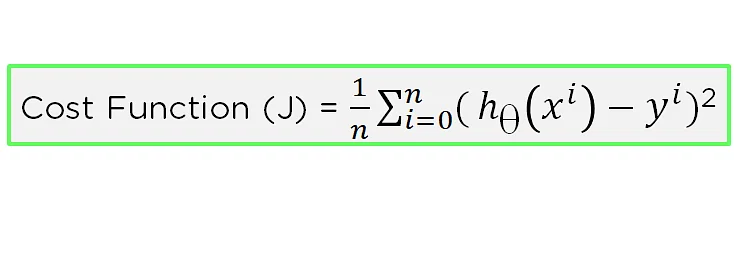

By the definition of gradient descent, you have to find the direction in which the error decreases constantly. This can be done by finding the difference between errors. The small difference between errors can be obtained by differentiating the cost function and subtracting it from the previous gradient descent to move down the slope.

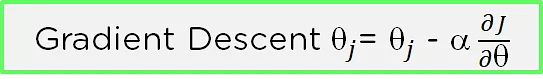

In [26]:
df = data[['Attacking Work Rate',
       'Defensive Work Rate', 'Pace Total', 'Shooting Total', 'Passing Total',
       'Dribbling Total', 'Defending Total', 'Physicality Total', 'Crossing',
       'Finishing', 'Heading Accuracy', 'Short Passing', 'Volleys',
       'Dribbling', 'Curve', 'Freekick Accuracy', 'LongPassing', 'BallControl',
       'Acceleration', 'Sprint Speed', 'Agility', 'Reactions', 'Balance',
       'Shot Power', 'Jumping', 'Stamina', 'Strength', 'Long Shots',
       'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties',
       'Composure', 'Marking', 'Standing Tackle', 'Sliding Tackle',
       'Goalkeeper Diving', 'Goalkeeper Handling', ' GoalkeeperKicking',
       'Goalkeeper Positioning', 'Goalkeeper Reflexes', 'ST Rating',
       'LW Rating', 'LF Rating', 'CF Rating', 'RF Rating', 'RW Rating',
       'CAM Rating', 'LM Rating', 'CM Rating', 'RM Rating', 'LWB Rating',
       'CDM Rating', 'RWB Rating', 'LB Rating', 'CB Rating', 'RB Rating',
       'GK Rating','Overall']]

display(df.describe())

,Pace Total,Shooting Total,Passing Total,Dribbling Total,Defending Total,Physicality Total,Crossing,Finishing,Heading Accuracy,Short Passing,...,CM Rating,RM Rating,LWB Rating,CDM Rating,RWB Rating,LB Rating,CB Rating,RB Rating,GK Rating,Overall
count,17529.000000,17529.000000,17529.000000,17529.000000,17529.000000,17529.000000,17529.000000,17529.000000,17529.000000,17529.000000,...,17529.000000,17529.000000,17529.000000,17529.000000,17529.000000,17529.000000,17529.000000,17529.000000,17529.000000,17529.000000
mean,67.993782,53.896115,58.123224,63.189457,50.298192,64.864339,49.511096,46.298020,51.909407,59.138684,...,57.429060,58.484112,56.308346,55.975812,56.308346,55.675908,54.566775,55.675908,23.325689,65.943237
std,10.689490,13.633943,9.724479,9.340373,16.403071,9.574861,17.953576,19.682471,17.391619,14.339640,...,13.217884,14.035482,13.949071,13.912260,13.949071,14.202017,14.782078,14.202017,15.187771,6.796701
min,28.000000,16.000000,25.000000,28.000000,15.000000,30.000000,6.000000,3.000000,5.000000,10.000000,...,18.000000,18.000000,17.000000,19.000000,17.000000,17.000000,18.000000,17.000000,10.000000,47.000000
25%,62.000000,44.000000,52.000000,58.000000,36.000000,59.000000,39.000000,31.000000,44.000000,55.000000,...,53.000000,54.000000,51.000000,49.000000,51.000000,49.000000,45.000000,49.000000,17.000000,62.000000
50%,68.000000,56.000000,59.000000,64.000000,54.000000,66.000000,54.000000,50.000000,55.000000,62.000000,...,60.000000,62.000000,59.000000,59.000000,59.000000,59.000000,58.000000,59.000000,18.000000,66.000000
75%,75.000000,64.000000,65.000000,69.000000,64.000000,72.000000,63.000000,62.000000,64.000000,68.000000,...,66.000000,67.000000,66.000000,66.000000,66.000000,65.000000,66.000000,65.000000,20.000000,70.000000
max,97.000000,92.000000,93.000000,94.000000,91.000000,91.000000,94.000000,94.000000,93.000000,93.000000,...,91.000000,92.000000,88.000000,89.000000,88.000000,87.000000,90.000000,87.000000,90.000000,91.000000


In [27]:

# get categorical columns
categorical = [var for var in df.columns if df[var].dtype=='O']
print('There are {} categorical variables.'.format(len(categorical)))
print('The categorical variables are :', categorical)
display(df[categorical].head())

# get numerical columns
numerical = [var for var in df.columns if df[var].dtype!='O']
print('There are {} numerical variables.'.format(len(numerical)))
print('The numerical variables are :', numerical)
display(df[numerical].head())

# check for missing values of categorical and numerical columns
assert check_missing_values(df,categorical) == False
assert check_missing_values(df,numerical) == False

There are 2 categorical variables.
The categorical variables are : ['Attacking Work Rate', 'Defensive Work Rate']


,Attacking Work Rate,Defensive Work Rate
0,Low,Low
1,Medium,Medium
2,High,Medium
3,High,High
4,High,Low


There are 58 numerical variables.
The numerical variables are : ['Pace Total', 'Shooting Total', 'Passing Total', 'Dribbling Total', 'Defending Total', 'Physicality Total', 'Crossing', 'Finishing', 'Heading Accuracy', 'Short Passing', 'Volleys', 'Dribbling', 'Curve', 'Freekick Accuracy', 'LongPassing', 'BallControl', 'Acceleration', 'Sprint Speed', 'Agility', 'Reactions', 'Balance', 'Shot Power', 'Jumping', 'Stamina', 'Strength', 'Long Shots', 'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure', 'Marking', 'Standing Tackle', 'Sliding Tackle', 'Goalkeeper Diving', 'Goalkeeper Handling', ' GoalkeeperKicking', 'Goalkeeper Positioning', 'Goalkeeper Reflexes', 'ST Rating', 'LW Rating', 'LF Rating', 'CF Rating', 'RF Rating', 'RW Rating', 'CAM Rating', 'LM Rating', 'CM Rating', 'RM Rating', 'LWB Rating', 'CDM Rating', 'RWB Rating', 'LB Rating', 'CB Rating', 'RB Rating', 'GK Rating', 'Overall']


,Pace Total,Shooting Total,Passing Total,Dribbling Total,Defending Total,Physicality Total,Crossing,Finishing,Heading Accuracy,Short Passing,...,CM Rating,RM Rating,LWB Rating,CDM Rating,RWB Rating,LB Rating,CB Rating,RB Rating,GK Rating,Overall
0,81,89,90,94,34,64,84,90,70,91,...,88,91,67,66,67,62,53,62,22,91
1,80,88,83,87,39,78,75,92,90,89,...,84,89,67,67,67,63,58,63,21,91
2,75,91,79,86,44,83,71,94,91,84,...,83,86,67,69,67,64,63,64,22,91
3,74,88,93,87,64,77,94,85,55,93,...,91,91,82,82,82,78,72,78,24,91
4,97,89,80,92,36,76,78,93,72,85,...,84,92,70,66,70,66,57,66,21,91


In [28]:

mapping = {'Low': -1, 'Medium': 0, 'High': 1}
df = df.replace({'Attacking Work Rate': mapping,'Defensive Work Rate': mapping })

# # label encoder for categorical columns
# le = LabelEncoder()
# df[categorical] = df[categorical].apply(lambda col: le.fit_transform(col))

display(df.head())

,Attacking Work Rate,Defensive Work Rate,Pace Total,Shooting Total,Passing Total,Dribbling Total,Defending Total,Physicality Total,Crossing,Finishing,...,CM Rating,RM Rating,LWB Rating,CDM Rating,RWB Rating,LB Rating,CB Rating,RB Rating,GK Rating,Overall
0,-1,-1,81,89,90,94,34,64,84,90,...,88,91,67,66,67,62,53,62,22,91
1,0,0,80,88,83,87,39,78,75,92,...,84,89,67,67,67,63,58,63,21,91
2,1,0,75,91,79,86,44,83,71,94,...,83,86,67,69,67,64,63,64,22,91
3,1,1,74,88,93,87,64,77,94,85,...,91,91,82,82,82,78,72,78,24,91
4,1,-1,97,89,80,92,36,76,78,93,...,84,92,70,66,70,66,57,66,21,91


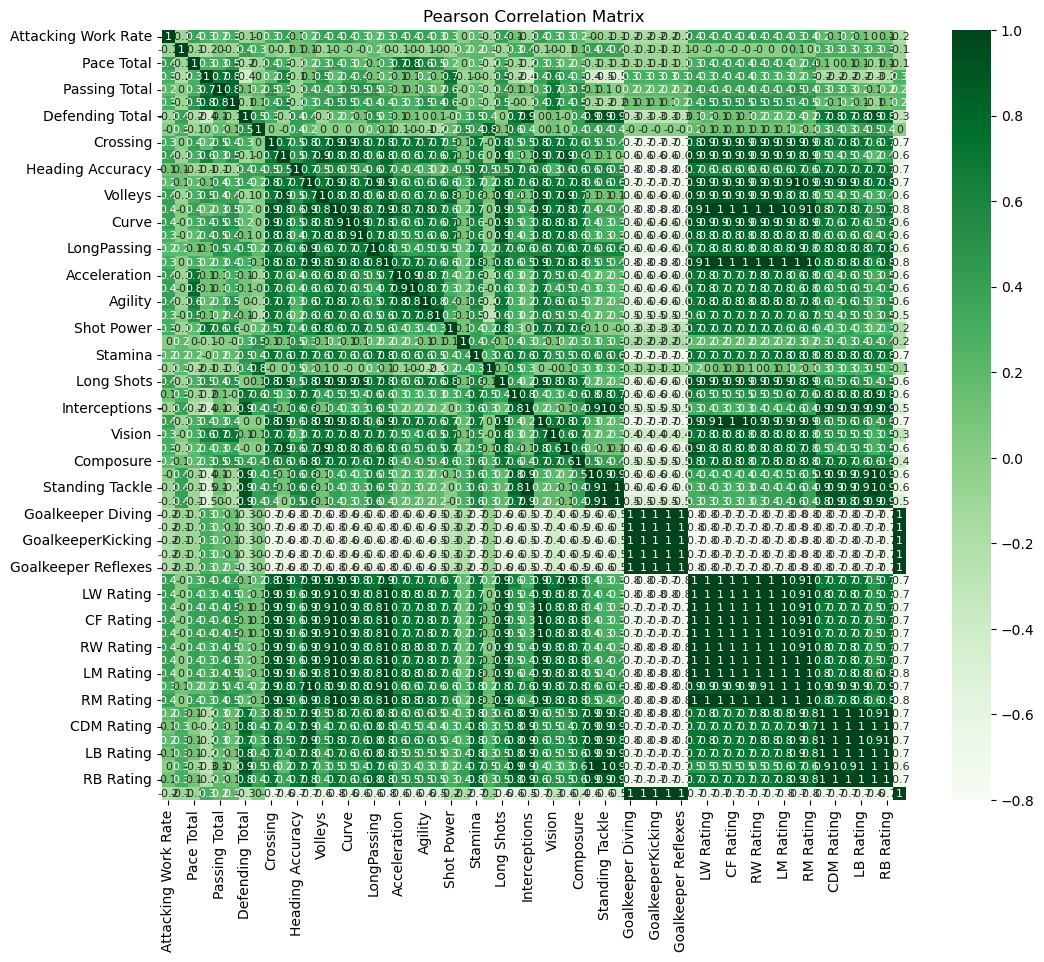

,Attacking Work Rate,Defensive Work Rate,Pace Total,Shooting Total,Passing Total,Dribbling Total,Defending Total,Physicality Total,Crossing,Finishing,...,LM Rating,CM Rating,RM Rating,LWB Rating,CDM Rating,RWB Rating,LB Rating,CB Rating,RB Rating,GK Rating
Attacking Work Rate,1.0,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-
Defensive Work Rate,-,1.0,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-
Pace Total,-,-,1.0,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-
Shooting Total,-,-,-,1.0,-,0.8,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-
Passing Total,-,-,-,-,1.0,0.8,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-
Dribbling Total,-,-,-,0.8,0.8,1.0,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-
Defending Total,-,-,-,-,-,-,1.0,-,-,-,...,-,-,-,-,0.8,-,0.8,0.9,0.8,-
Physicality Total,-,-,-,-,-,-,-,1.0,-,-,...,-,-,-,-,-,-,-,-,-,-
Crossing,-,-,-,-,-,-,-,-,1.0,-,...,0.9,0.9,0.9,0.8,-,0.8,-,-,-,-
Finishing,-,-,-,-,-,-,-,-,-,1.0,...,0.9,0.8,0.9,-,-,-,-,-,-,-


In [29]:

# get correlations
correlations = df.corr().round(1)
cor_target = abs(correlations['Overall'])

# Display features with correlation > cor_threshold
cor_threshold = 0.8
removed_features = cor_target[cor_target > cor_threshold]
removed_features = removed_features.to_frame().transpose()
removed_features_columns = removed_features.columns

# dropping low correlated features
df = df.drop(removed_features_columns, axis=1)

# plot pearson correlation matrix
fig_1 = plt.figure(figsize=(12, 10))
new_correlations = df.corr().round(1)
sns.heatmap(new_correlations, annot=False, cmap='Greens', annot_kws={'size': 8})
plt.title('Pearson Correlation Matrix')
plt.show()

# show high correlated features
highly_correlated_features = new_correlations[new_correlations > 0.75]
display(highly_correlated_features.fillna('-'))

 TRAINING SET
 X_train.shape:  (10517, 58)
 Y_train.shape:  (10517, 1)
 TESTING SET
 X_test.shape:  (7012, 58)
 Y_test.shape:  (7012, 1)


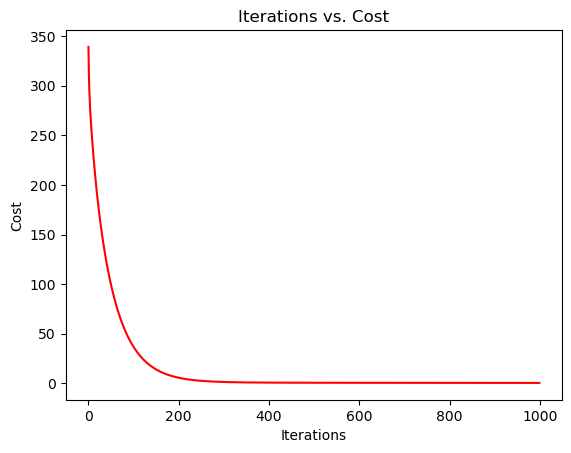

 My Linear Regression:
 Mean Absolute Error:  0.6810599935055939
 Root Mean Square Error:  0.8737452739536178
 R square:  0.996579044844461
 {'mae': 0.6810599935055939, 'mse': 0.7634308037562831, 'rmse': 0.8737452739536181, 'mape': 0.03365375756049363, 'mpe': -0.0019532344634805828}
 sklearn Linear Regression:
 Mean Absolute Error:  0.31938555639477684
 Root Mean Square Error:  0.4020324237524816
 R square:  0.9992757310581719
 {'mae': 0.31938555639477784, 'mse': 0.16163006974829558, 'rmse': 0.4020324237524824, 'mape': 0.01583596535766425, 'mpe': -6.382925445407031e-05}


In [12]:



# scalers to be used?
scaler = MinMaxScaler()
scaler = StandardScaler()

# Create X, y and theta
X = df.iloc[:,:-1]
X = scaler.fit_transform(X)
ones = np.ones([len(df), 1])
X = np.concatenate((ones, X), axis=1)
y = df.iloc[:, -1:].values

# splitting dataset
split = 0.6
X_train, y_train, X_test, y_test = my_test_train_split(X, y, split)

# using custom linear regression
model = MyLinearRegression(X_train,y_train)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
# print metrics
mae, rmse, r_square = metrics(y_pred, y_test)
Printer.green("My Linear Regression:")
Printer.yellow("Mean Absolute Error: ", mae)
Printer.yellow("Root Mean Square Error: ", rmse)
Printer.yellow("R square: ", r_square)
Printer.red(error_metrics(y_pred,y_test))

# using sklearn linear regression
model = LinearRegression()
model = model.fit(X_train, y_train)
y_pred = model.predict(X_test)
# print metrics
mae, rmse, r_square = metrics(y_pred, y_test)
Printer.green("sklearn Linear Regression:")
Printer.yellow("Mean Absolute Error: ", mae)
Printer.yellow("Root Mean Square Error: ", rmse)
Printer.yellow("R square: ", r_square)
Printer.red(error_metrics(y_pred,y_test))